<a href="https://colab.research.google.com/github/prudhvi-somisetty/DL-Lab/blob/main/EXP_5_Logistic_Regression_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXP-5 (Build Logistic Regression Classifier using Neural Networks)**<br> by  Srinivas(122021601001) 

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

In [ ]:
#importing the data in to X & y 
#since this is a very small dataset only train set is present 
X, y  = tfds.as_numpy(tfds.load('iris',split='train',batch_size=-1,as_supervised=True,))

Shuffling and writing examples to /root/tensorflow_datasets/iris/2.0.0.incomplete9V3XOG/iris-train.tfrecord


Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


In [ ]:
#printing the top values of the feature variable
X

array([[5.1, 3.4, 1.5, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 2.4, 3.7, 1. ],
       [4.6, 3.4, 1.4, 0.3],
       [7.7, 2.8, 6.7, 2. ],
       [7. , 3.2, 4.7, 1.4],
       [4.6, 3.2, 1.4, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [6.7, 3.3, 5.7, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5. , 3. , 1.6, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [6.7, 3. , 5. , 1.7],
       [5.7, 2.6, 3.5, 1. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.5, 3.2, 5.1, 2. ],
       [5.7, 3

In [ ]:
#finding unique labels in the class variable
np.unique(y)

array([0, 1, 2])

# Preprocessing
this is a multi class dataseet but we are trying to convert it into a binary class<br>
0 (Iris-setosa)<br>
1 (Iris-versicolor)<br>
2 (Iris-virginica)<br>
here we are converting the dataset into <br>
0 (Iris-setosa)<br>
1 (not a setosa)<br>

keeping only sentosa and changing the rest into not a sentosa

In [ ]:
# converting multi-class objhects to a binary class
def convert_binary(y):
  new_y = np.zeros(len(y),dtype=np.int8)
  for i in range(len(y)):
    if(y[i] != 0):
      new_y[i] = 1
  return new_y

In [ ]:
binary_y = convert_binary(y)
np.unique(binary_y)

array([0, 1], dtype=int8)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

layer = model.layers[0]
print("Initial Weights")
print("Layer:",layer)
print("layer weights:  ",layer.weights)
print("layer bias initializer:  ",layer.bias_initializer)

Initial Weights
Layer: <tensorflow.python.keras.layers.core.Dense object at 0x7f0e330fa190>
layer weights:   []
layer bias initializer:   <tensorflow.python.keras.initializers.initializers_v2.Zeros object at 0x7f0e37c59690>


In [ ]:
history = model.fit(X,binary_y, steps_per_epoch=10, epochs=100, verbose=1, validation_split=0.3,)


Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 1.9551 - accuracy: 0.6571 - val_loss: 1.7407 - val_accuracy: 0.6889
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9186 - accuracy: 0.6571 - val_loss: 1.7091 - val_accuracy: 0.6889
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.8821 - accuracy: 0.6571 - val_loss: 1.6781 - val_accuracy: 0.6889
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.8484 - accuracy: 0.6571 - val_loss: 1.6460 - val_accuracy: 0.6889
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8118 - accuracy: 0.6571 - val_loss: 1.6147 - val_accuracy: 0.6889
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7767 - accuracy: 0.6571 - val_loss: 1.5833 - val_accuracy: 0.6889
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7399 - accuracy: 0.6571 - val_loss: 1.5525 - val_accuracy: 0.6889
Epoch 8/100


In [ ]:
score, accuracy = model.evaluate(X[1:75], binary_y[1:75], batch_size=16, verbose=0)
print("NN-Score = {:.2f}".format(score))
print("NN-Accuracy = {:.2f}".format(accuracy))

NN-Score = 0.17
NN-Accuracy = 1.00


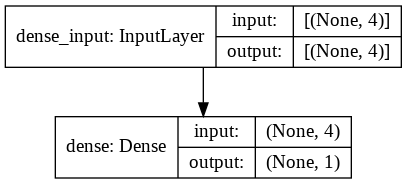

In [ ]:
#plotting the model of logistic regression here is is in a simple preceptron style
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#Confusion matrix
y_pred = model.predict(X)

In [ ]:
tf.math.confusion_matrix(binary_y, y_pred )

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 50,   0],
       [100,   0]], dtype=int32)>

(0.0, 2.044780810922384)

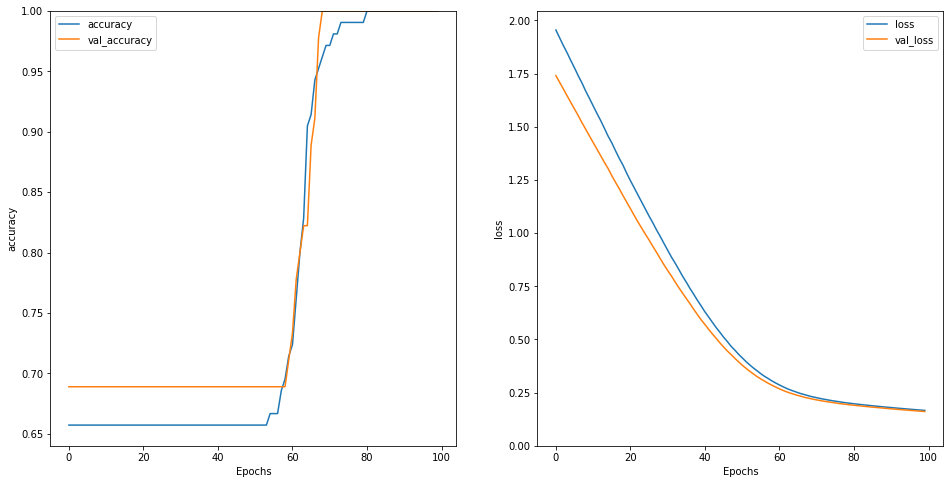

In [ ]:
#Plotting metric curves
import matplotlib.pyplot as plt



plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.ylim(0, None)

In [ ]:
layer = model.layers[0]
print("Layer:",layer)
print("layer weights:  ",layer.weights)
print("layer bias:  ",layer.bias.numpy())
print("layer bias initializer:  ",layer.bias_initializer)

Layer: <tensorflow.python.keras.layers.core.Dense object at 0x7f0e330fa190>
layer weights:   [<tf.Variable 'dense/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[ 0.2737838 ],
       [-0.7783373 ],
       [ 0.5512839 ],
       [ 0.71130985]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.6268976], dtype=float32)>]
layer bias:   [-0.6268976]
layer bias initializer:   <tensorflow.python.keras.initializers.initializers_v2.Zeros object at 0x7f0e37c59690>
